In [1]:
from crypt_currency.api import Api
from crypt_currency.plot import Plot
from crypt_currency.buy_sell import BuySell
from crypt_currency.simulator import Simulator
from IPython.display import clear_output
import datetime as dt
import time

api, plot, buySell = Api(), Plot(), BuySell()
simulator = Simulator(my_deposit=30000)

In [2]:
def exec_buy_sell(api, plot, desig_time):
    clear_output(wait = True)
    # 1時間分のBitcoinの値を取得（1分足）
    val_df = api.get_price(desig_time, period=60, plt_show=True)
    # 移動平均の表示
    plot.show_moving_avg(val_df)
    # 傾きの表示
    plot.show_grad(val_df)
    # 予測（売買するか）
    result = buySell.predict(val_df)
    # 予測に応じたシミュレーション
    simulator.exec(action=result, current_yen=val_df["close"][len(val_df) - 1])

In [3]:
def main(date_time, interval):
    # 売買状況
    clear_output(wait=True)
    exec_buy_sell(api, plot, date_time)
    time.sleep(interval)

    # 現在の資産情報
    clear_output(wait=True)
    print(simulator.get_record_hist().tail())
    time.sleep(interval)

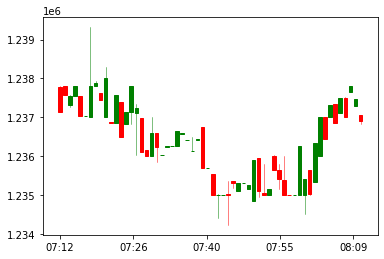

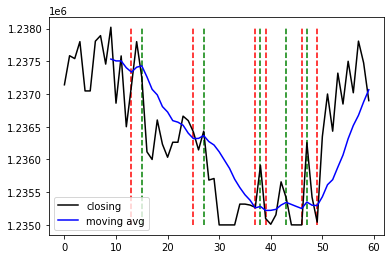

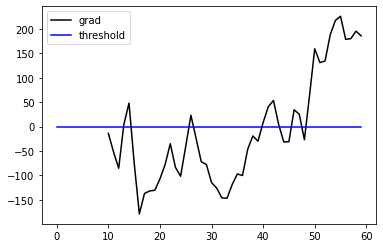

In [4]:
# シミュレータ環境
date_now = dt.datetime.now() + dt.timedelta(minutes=-60)
for min in range(60):
    designated_time = date_now + dt.timedelta(minutes=-(59-min))
    main(designated_time, 1/2)
exec_buy_sell(api, plot, date_now)

In [7]:
hist = simulator.get_record_hist()
hist

,title,total,yen,btc
0,,30000.00,30000.00,0.0
1,,30000.00,30000.00,0.0
2,,30000.00,30000.00,0.0
3,,30000.00,30000.00,0.0
4,,30000.00,30000.00,0.0
...,...,...,...,...
56,,29983.17,29983.17,0.0
57,,29983.17,29983.17,0.0
58,,29983.17,29983.17,0.0
59,,29983.17,29983.17,0.0


In [6]:
# 本番環境
# while True:
#     main(dt.datetime.now(), 60/2)